In [40]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [3]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

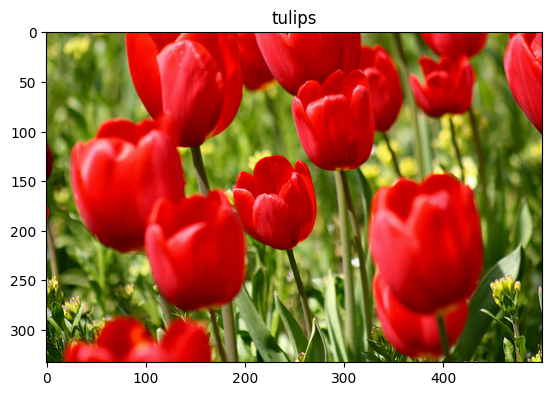

In [5]:
image, label = next(iter(train_ds))
get_label_name = metadata.features['label'].int2str

_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

#### Function to compare original vs augmented image 

In [8]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)

### Flip image

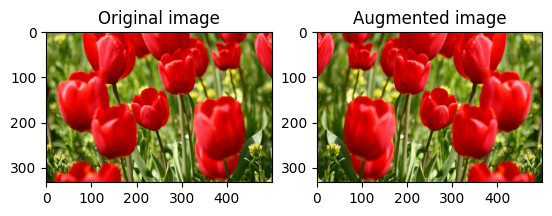

In [13]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

### Grayscale

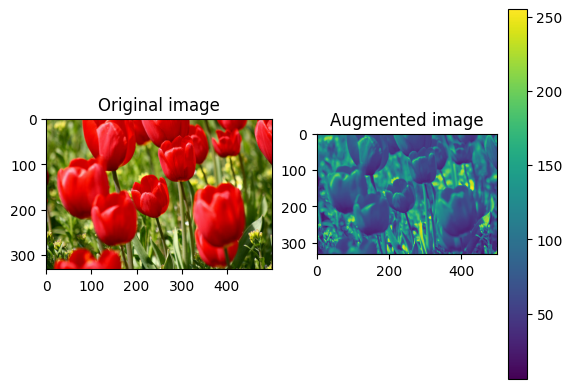

In [19]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

### Satured 

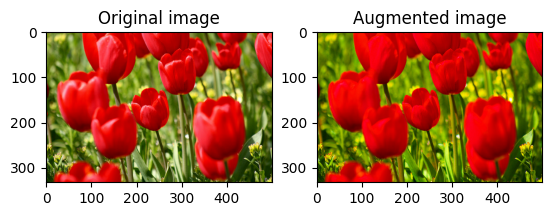

In [36]:
satured = tf.image.adjust_saturation(image, 3)
visualize(image, satured)

### Change image brightness

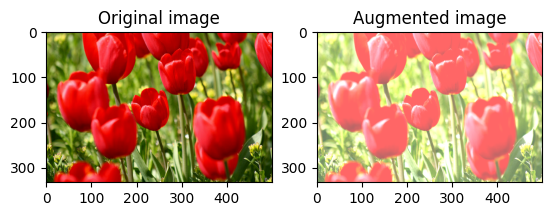

In [54]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

### Center crop

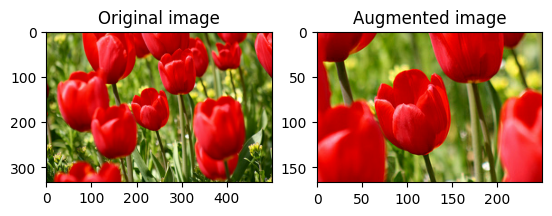

In [63]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

### Rotate

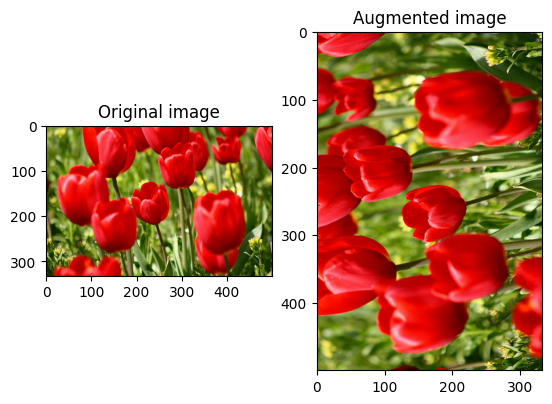

In [66]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

## Random transformations

### Randomly change image brightness

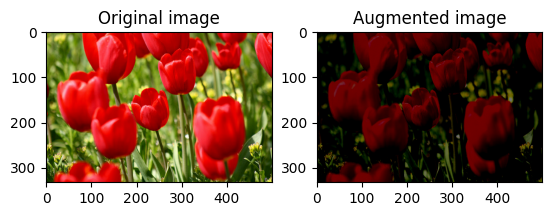

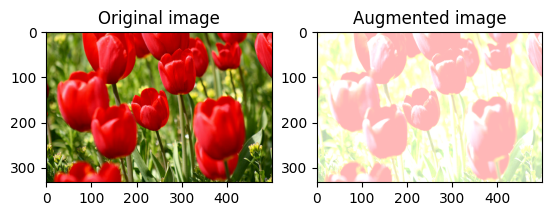

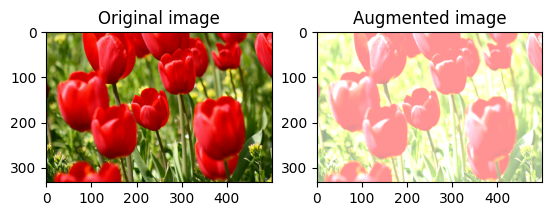

In [78]:
for i in range(3):
    seed = (i,0)
    stateless_random_brightness = tf.image.stateless_random_brightness(
        image, max_delta=0.95, seed=seed
    )
    visualize(image, stateless_random_brightness)

#### Randomly change image contrast

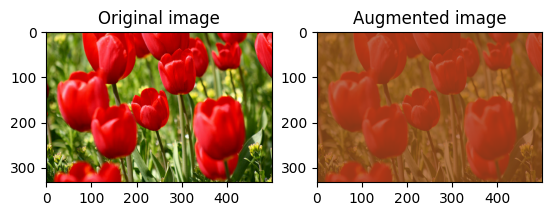

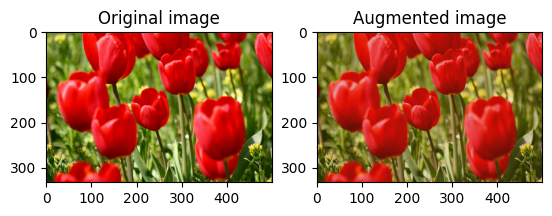

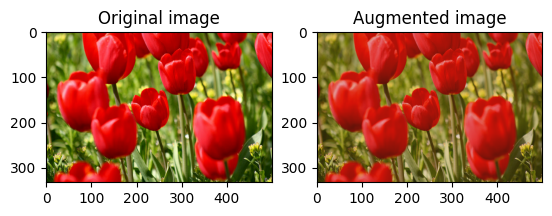

In [81]:
for i in range(3):
    seed = (i, 0)
    stateless_random_contrast = tf.image.stateless_random_contrast(
        image, lower=0.1, upper=0.9, seed=seed
    )
    visualize(image, stateless_random_contrast)

#### Randomly crop a image

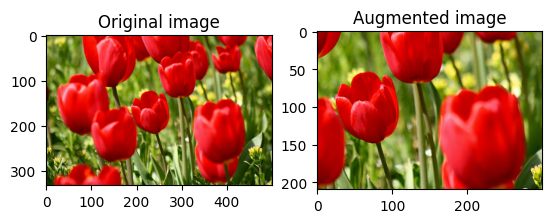

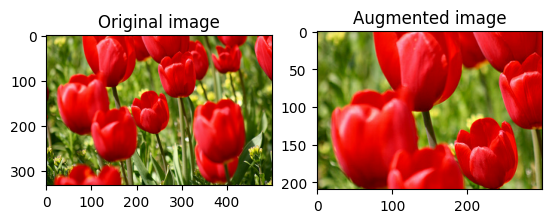

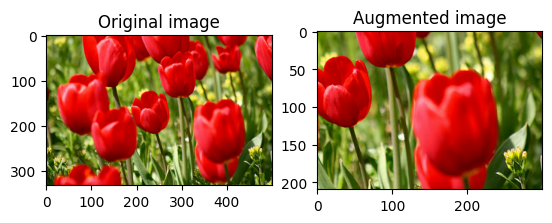

In [87]:
for i in range(3):
    seed = (i, 0)
    stateless_random_crop = tf.image.stateless_random_crop(
        image, size=[210,300,3], seed=seed
    )
    visualize(image, stateless_random_crop)